# 
Data Columns

match_id
inning
batting_team
bowling_team
over
ball
batsman
non_striker
bowler
is_super_over
wide_runs
bye_runs
legbye_runs
noball_runs
penalty_runs
batsman_runs
extra_runs
total_runs
player_dismissed
dismissal_kind
fielder

Ask

Create a personal copy of the data to analyze the data to answer the following questions.
The choice of tool for analysis is not a restriction

Balls per Wicket, Balls per Six, and Runs per Wicket
The ratio of total balls to total dots for each batsman
Percentage of boundary runs to total runs for each batsman
Batsman responsible for the most wins
Best Death Over Bowler
Most Fifties by Batsmen

Expectation
Explain your findings to 4 of the 6 questions mentioned above, those who answer all 6 get additional points
Visualizations would help, however, just numbers would also do
List down your approach to analyzing the given data

Brownie Points
Any fascinating insight apart from the above-asked question based on the given data 


In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install matplotlib

In [3]:
data_df=pd.read_csv('IPL Data - IPL.csv')


In [5]:
data_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
# finding the total valid balls which are finding subtraction of white and no balls from the total balls
data_df.replace(0,np.nan,inplace=True)

In [32]:
# finding the number of white alls 
num_white=data_df.wide_runs.count()
#finding the number of noballs
num_no_balls=data_df.noball_runs.count()
# finding the total number of balls
total_balls=len(data_df)
# finding the total number of valid balls
total_valid_balls=total_balls-num_white-num_no_balls
# finding the total number of wickets
total_wickets=data_df.player_dismissed.count()
# finding the total  numbe of sixes assuming that 6 runs can 
"""Yes. There is no limit on runs scored by running per ball asper the Law 18 of 'Laws of Cricket'. 
Also runs due to overthrows are added in batsman's score so 6 or more runs can be scored
without ball crossing the boundary."""
# but we are considering a six as when balls does not touch the ground before reaching the boundary
num_sixes=data_df[data_df.total_runs==6].total_runs.count()
#  finding the total runs using the sum function
total_runs=data_df.total_runs.sum()
#Balls per Wicket, Balls per Six, and Runs per Wicket
Balls_per_Wicket=total_valid_balls/total_wickets
print("The Balls per Wicket for IPL data is {:.2f}".format(Balls_per_Wicket))
Balls_per_Six=total_valid_balls/num_sixes
print("The Balls Per Wicket for the IPL Data is {:.2f} ".format(Balls_per_Six))
runs_Per_Wicket=total_runs/total_wickets
print("The Average runs before a fall of Wicket is {:.2f}".format(runs_Per_Wicket))


235290.0

The Balls per Wicket for IPL data is 19.58
The Balls Per Wicket for the IPL Data is 21.23 
The Average runs before a fall of Wicket is 26.63


In [102]:
#2.The ratio of total balls to total dots for each batsman
"""as wide ball and no ball are considered illegal deliveries therfore we will group the dataframe on the batsman
and check if the run is scored on that ball and if it is scored then it is not a dot ball"""

data_df.replace(np.nan,0,inplace=True)
grouped_data=data_df.groupby('batsman').count()
total_balls_Played_Batsman=grouped_data['ball']
#to find the balls in which no runs are scores or dot balls
new_data=data_df[data_df.total_runs==0]
# No of dot Balls
dot_Balls_Played_Batsman=new_data.groupby("batsman").count()['ball']
total_balls_Played_Batsman
Required_ratio=total_balls_Played_Batsman/dot_Balls_Played_Batsman
"""Output 
  batsman
A Ashish Reddy    3.500000
A Chandila        2.333333
A Chopra          1.875000
A Choudhary       5.000000
A Dananjaya       2.500000
                    ...   
YV Takawale       2.056180
Yashpal Singh     1.810811
Younis Khan       1.750000
Yuvraj Singh      2.554398
Z Khan            1.98591"""


batsman
A Ashish Reddy    3.500000
A Chandila        2.333333
A Chopra          1.875000
A Choudhary       5.000000
A Dananjaya       2.500000
                    ...   
YV Takawale       2.056180
Yashpal Singh     1.810811
Younis Khan       1.750000
Yuvraj Singh      2.554398
Z Khan            1.985915
Name: ball, Length: 516, dtype: float64

In [163]:
#3. Percentage of boundary runs to total runs for each batsman

"""" case we will only consider players who have hitted atleast one 4 or 6 in the calcualtion otherwise it will show error
as some of the batsman dont hit a boundary"""

total_Runs_By_All_Batsman=data_df.groupby("batsman")["batsman_runs"].sum()   # (516,) it contains 516 batsman
# find batsman who have either hit a 4 or 6
new_data=data_df[data_df["total_runs"].isin([4,6])]
# find the total_runs by batsman
total_Runs_By_Batsman=new_data.groupby("batsman")["total_runs"].sum() 
# find the total runs made by batsman using boundaries
runs__By_Boundaries_Batsman=new_data.groupby("batsman")["batsman_runs"].sum() # (426,) have hitted a 4 or 6

boundary_Percentage=(runs__By_Boundaries_Batsman/total_Runs_By_Batsman)*100
pd.set_option("display.precision",2)
boundary_Percentage
"""batsman
A Ashish Reddy     97.47
A Chopra          100.00
A Choudhary       100.00
A Flintoff         88.89
A Hales            97.83
                   ...  
YK Pathan          99.61
YV Takawale        96.83
Yashpal Singh     100.00
Yuvraj Singh       99.66
Z Khan            100.00
Length: 426, dtype: float64"""



batsman
A Ashish Reddy     97.47
A Chopra          100.00
A Choudhary       100.00
A Flintoff         88.89
A Hales            97.83
                   ...  
YK Pathan          99.61
YV Takawale        96.83
Yashpal Singh     100.00
Yuvraj Singh       99.66
Z Khan            100.00
Length: 426, dtype: float64

In [240]:
#4, Batsman responsible for the most wins

# winning condition is that the team which scores more will win the match so we 
data_teams=data_df.groupby(["match_id","inning","batting_team"])["total_runs"].sum().reset_index()
data_teams["winning_Team"]=data_teams["total_runs"]>data_teams["total_runs"].shift(1,axis=0)

# Comment: I wanted to find the criteria to compare two adjacent rows such as index 0 and index 1 total runs and select the winner an
# and on the basis of winner I can group the runs scored on the relative indexes and find out the player who 
# highest in the matches to find the batsman who contributed to the most wins but I was unable to find the results.
                                       

,match_id,inning,batting_team,total_runs,winning_Team
0,1,1,Sunrisers Hyderabad,207,False
1,1,2,Royal Challengers Bangalore,172,False
2,2,1,Mumbai Indians,184,True
3,2,2,Rising Pune Supergiant,187,True
4,3,1,Gujarat Lions,183,False
...,...,...,...,...,...
1523,11413,2,Delhi Capitals,170,False
1524,11414,1,Delhi Capitals,155,False
1525,11414,2,Chennai Super Kings,162,True
1526,11415,1,Mumbai Indians,152,False


In [309]:
# 5.Best Death Over Bowelers
# Death Over are known as the 
death_over_data=data_df[data_df["over"].isin([15,20])]
death_over_matches=death_over_data.groupby("bowler")["match_id"].count()
death_over_runs_in_matches=death_over_data.groupby("bowler")["total_runs"].sum()
death_over_economy=death_over_runs_in_matches/death_over_matches
death_over_economy.sort_values(ascending=True)

bowler
AC Gilchrist      0.00
V Chakravarthy    0.17
M Santner         0.33
DJ Thornely       0.33
SE Bond           0.47
                  ... 
CL White          3.43
MG Neser          3.50
KM Asif           3.50
JR Hopes          3.58
VS Malik          4.00
Length: 300, dtype: float64

<AxesSubplot: xlabel='batsman'>

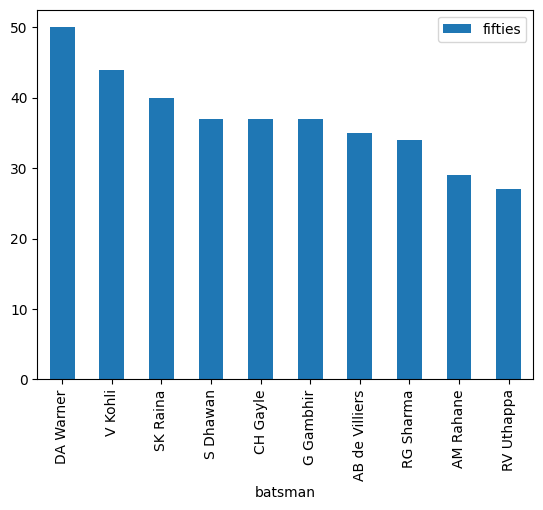

In [310]:
#most fifties by  the batsman
# if in each match score is greater than 50 then we  count it as 1 so we have to group by match_id and find the sum of batsman runs
new_data=data_df.groupby(["match_id","batsman"])["total_runs"].sum().reset_index()
new_data["fifties"]=new_data.total_runs>50
fifties_data=new_data[new_data.fifties]


num_Fifties_By_Batsman=fifties_data.groupby("batsman")["fifties"].count().reset_index().sort_values(by="fifties",ascending=False)
#num_Boundaies_By_Batsman

#new_data
num_Fifties_By_Batsman.head(10).plot.bar(x="batsman",y="fifties")

